In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import sklearn.metrics as skm

In [2]:
df = pd.read_csv('car_sales_data.csv')
df.describe()

,Engine size,Year of manufacture,Mileage,Price
count,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.773058,2004.209440,112497.320700,13828.903160
std,0.734108,9.645965,71632.515602,16416.681336
min,1.000000,1984.000000,630.000000,76.000000
25%,1.400000,1996.000000,54352.250000,3060.750000
50%,1.600000,2004.000000,100987.500000,7971.500000
75%,2.000000,2012.000000,158601.000000,19026.500000
max,5.000000,2022.000000,453537.000000,168081.000000


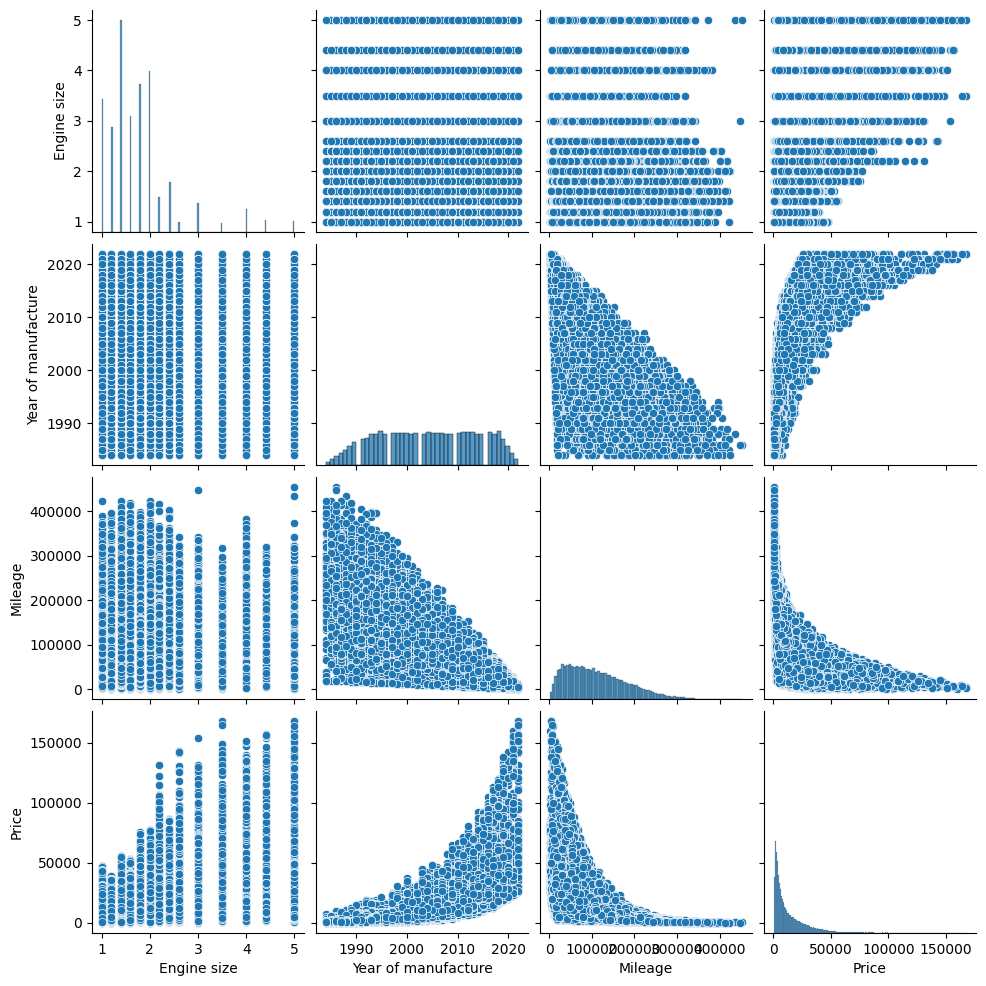

In [65]:
sns.pairplot(df)

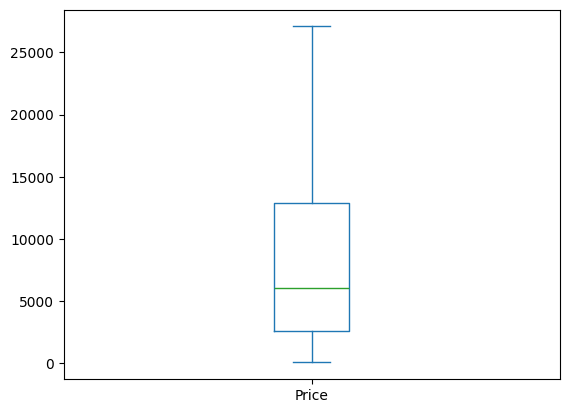

In [109]:
price_limit = df['Price'].quantile(0.85)
df_no_outliers = df[df['Price'] < price_limit] 
df_no_outliers['Price'].plot(kind='box')
plt.show()

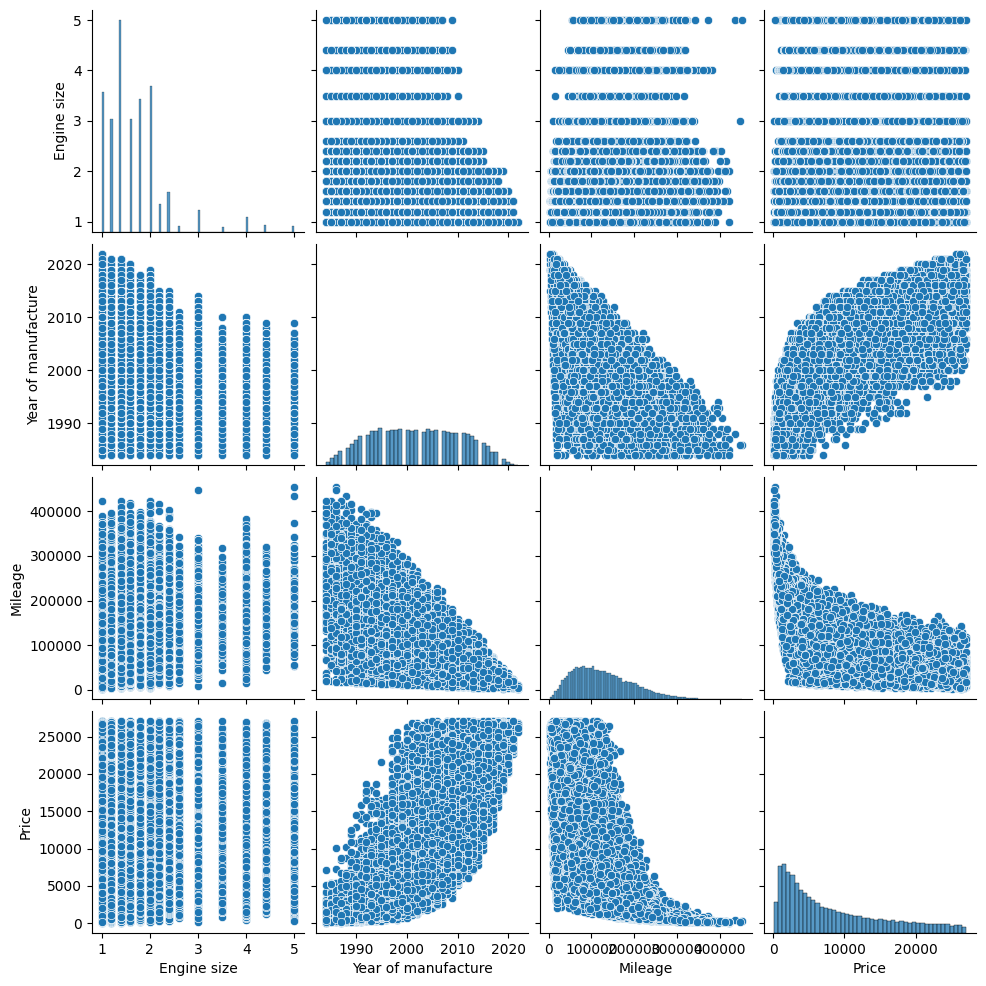

In [124]:
sns.pairplot(df_no_outliers)

In [118]:
unused_params = {'Year of manufacture', 'Mileage'}
dummy_params = list({'Manufacturer', 'Model', 'Fuel type'} - unused_params)

In [119]:
params = df_no_outliers.copy()

params['MileageLog'] = np.log(params['Mileage'])

if len(unused_params) > 0:
    params = params.drop(columns=unused_params)

if len(dummy_params) > 0:
    params = pd.get_dummies(params, columns=dummy_params, drop_first=False)

params

,Engine size,Price,MileageLog,Manufacturer_BMW,Manufacturer_Ford,Manufacturer_Porsche,Manufacturer_Toyota,Manufacturer_VW,Fuel type_Diesel,Fuel type_Hybrid,...,Model_Golf,Model_M5,Model_Mondeo,Model_Passat,Model_Polo,Model_Prius,Model_RAV4,Model_X3,Model_Yaris,Model_Z4
0,1.0,3074,11.754302,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1.6,24072,10.576177,False,True,False,False,False,True,False,...,False,False,True,False,False,False,False,False,False,False
3,1.8,1705,12.258732,False,False,False,True,False,False,True,...,False,False,False,False,False,False,True,False,False,False
4,1.0,4101,11.758762,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
6,1.8,14350,11.370048,False,True,False,False,False,True,False,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49993,1.8,6654,11.703290,False,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
49994,1.8,10639,11.529133,False,False,False,True,False,False,True,...,False,False,False,False,False,False,True,False,False,False
49996,1.8,9430,11.562858,False,False,False,True,False,False,True,...,False,False,False,False,False,True,False,False,False,False
49998,1.0,23630,10.183692,False,True,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


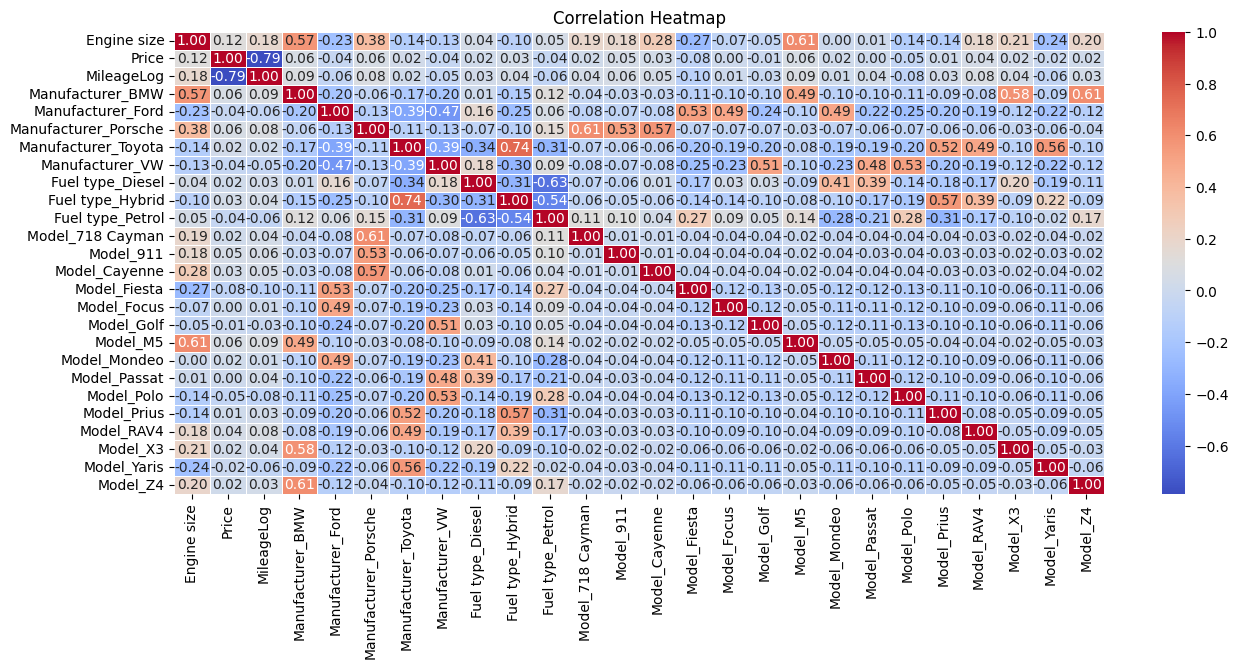

In [120]:
plt.figure(figsize=(15,6))
sns.heatmap(params.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

In [121]:
y = params['Price']
X = params.drop(columns='Price').astype(float)
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     5983.
Date:                Sun, 02 Nov 2025   Prob (F-statistic):               0.00
Time:                        15:03:32   Log-Likelihood:            -4.1039e+05
No. Observations:               42500   AIC:                         8.208e+05
Df Residuals:                   42481   BIC:                         8.210e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 7.269e+04    225.621    322.200      0.000    7.23e+04    7.31e+04
Engine size           1712.0536     61.016     28.059      0.000    1592.461    1831.647
MileageLog           -9484.5980     29.322   -323.458      0.000   -9542.071   -9427.125
Manufacturer_BMW      1.501e+04     86.482    173.558      0.000    1.48e+04    1.52e+04
Manufacturer_Ford     1.369e+04     50.706    270.085      0.000    1.36e+04    1.38e+04
Manufacturer_Porsche  1.621e+04     93.072    174.218      0.000     1.6e+04    1.64e+04
Manufacturer_Toyota    1.42e+04     59.802    237.381      0.000    1.41e+04    1.43e+04
Manufacturer_VW       1.358e+04     50.017    271.501      0.000    1.35e+04    1.37e+04
Fuel type_Diesel      2.408e+04     86.238    279.170      0.000    2.39e+04    2.42e+04
Fuel type_Hybrid      2.488e+04     92.263    269.694      0.000    2.47e+04    2.51e+04
Fuel type_Petrol      2.374e+04     80.529    294.765      0.000    2.36e+04    2.39e+04
Model_718 Cayman      4262.9274    131.253     32.479      0.000    4005.669    4520.186
Model_911             7333.4707    144.610     50.712      0.000    7050.033    7616.908
Model_Cayenne         4618.4424    142.806     32.341      0.000    4338.541    4898.344
Model_Fiesta          2799.8715     54.686     51.199      0.000    2692.685    2907.057
Model_Focus           5487.3737     49.970    109.814      0.000    5389.432    5585.315
Model_Golf            4506.0207     48.418     93.066      0.000    4411.121    4600.920
Model_M5              5900.2063    146.403     40.301      0.000    5613.253    6187.160
Model_Mondeo          5407.6494     56.894     95.048      0.000    5296.136    5519.162
Model_Passat          5786.4432     57.045    101.436      0.000    5674.634    5898.253
Model_Polo            3287.2203     51.240     64.153      0.000    3186.788    3387.653
Model_Prius           4924.7497     63.531     77.517      0.000    4800.227    5049.273
Model_RAV4            5914.5644     65.842     89.829      0.000    5785.512    6043.617
Model_X3              4620.0177     98.128     47.082      0.000    4427.686    4812.350
Model_Yaris           3356.5323     58.958     56.931      0.000    3240.974    3472.090
Model_Z4              4489.4957     93.742     47.892      0.000    4305.760    4673.231
==============================================================================
Omnibus:                     3121.931   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15025.982
Skew:                          -0.182   Prob(JB):                         0.00
Kurtosis:                       5.890   Cond. No.                     1.21e+17
==============================================================================

Notes:
[1] Standard Errors 

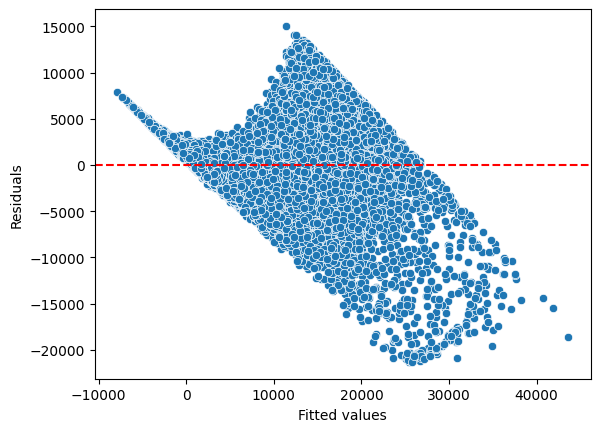

In [122]:
sns.scatterplot(x=model.fittedvalues, y=model.resid)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.show()

In [123]:
mse = skm.mean_squared_error(y, model.fittedvalues)
rmse = np.sqrt(mse)
mae = skm.mean_absolute_error(y, model.fittedvalues)
print(f"MSE={mse:.2f}, RMSE={rmse:.2f}, MAE={mae:.2f}")

MSE=14281614.42, RMSE=3779.10, MAE=2721.73
